# Testing hexagonal camemberts

Do I manage to reproduce Lara's results? Let us see!

Also, good test to run things from a Jupyter notebook

In [3]:
import config as cfg
from json_dump import make_json_file
from contact_utils import get_camembert_cmap

In [53]:
import numpy as np
from json_dump import *
import contact_utils as cu

### Define model parameters

model_params = {}

# ---------- LATTICE OPTIONS ----------

# Options:
# "chain", "square", "triangular", "cubic", "bcc", "fcc"
model_params["lattice_name"] = "triangular"

# Lattice dimensions
model_params["lx"] = 10
model_params["ly"] = 10  # Has to be 1 for chain
model_params["lz"] = 1  # Has to be 1 for square & triangular

# ---------- MODEL PARAMETERS ----------

# Number of particle types
model_params["n_types"] = 1

# Number of particles of each type
model_params["n_particles"] = [20]

# Couplings is its own beast. Should be gotten with the appropriate helper
# function.

# For chain
j_crystal = 00.5
j_line = -8
sigma = 6
j_infty = 15

cmap_wrapper = cu.ContactMapWrapper.triangular(1)
cmap_matrix = cmap_wrapper.get_single_species_contact_matrix(0)
cmap_matrix[0, 0] = 1
cmap_wrapper.set_single_species_contact(0, cmap_matrix)

model_params["couplings"] = cmap_wrapper.get_formatted_couplings()
# model_params["couplings"] = cu.get_camembert_cmap(j_crystal, j_line, sigma, j_infty)
# model_params["couplings"] = cu.get_camembert_cmap(1, 0, 0, 0)

# Initialization option
model_params["initialize_option"] = "random"

# If "initialize_option" is set to "from_file", we must specify the location of
# the input file
# model_params["state_input"] = "./..."

# Options for average collection
model_params["state_av_option"] = True
model_params["e_av_option"] = True

if model_params["state_av_option"]:
    cfg.averages_path.mkdir(parents=True,exist_ok=True)
    model_params["state_av_output"] = str(cfg.averages_path)+"/"

if model_params["e_av_option"]:
    cfg.energy_path.mkdir(parents=True, exist_ok=True)
    model_params["e_av_output"] = str(cfg.energy_path)+"/"

# Pick the probabilities of different moves
# Options:
""""
    "swap_empty_full",
    "swap_full_full",
    "rotate",
    "mutate",
    "rotate_and_swap_w_empty"
"""

moves_dict = {}
moves_dict["swap_empty_full"] = 0
moves_dict["rotate"] = 1
moves_dict["rotate_and_swap_w_empty"] = 0

model_params["move_probas"] = moves_dict

print(cfg.input_path)
make_json_file(model_params, cfg.input_path/"model_params.json")

### Define mc parameters

mc_params = {}

# Number of MC steps used for equilibration
mc_params["mcs_eq"] = 100

# Number of MC steps used for averaging
mc_params["mcs_av"] = 1

# Type of cooling schedule
# if exponential chosen: specify log10(T) as initial and final temperatures
mc_params["cooling_schedule"] = "exponential"

# Initial annealing temperature
mc_params["Ti"] = 0

# Final annealing temperature
mc_params["Tf"] = -5

# Number of annealing steps
mc_params["Nt"] = 10

# Option to collect state checkpoints at the end of each temperature cycle
mc_params["checkpoint_option"] = True

# If checkpoint is True, we need to provide the output address for the 
# checkpoint files
print(cfg.structures_path)
if mc_params["checkpoint_option"]:
    mc_params["checkpoint_address"] = str(cfg.structures_path)+"/"

# Output location of the final state configuration (must end with "/")
mc_params["final_structure_address"] = str(cfg.structures_path)+"/"

make_json_file(mc_params, cfg.input_path/"mc_params.json")

/Users/vincent/research/coding/projects/2404_frusa_lattice_mc/input
/Users/vincent/research/coding/projects/2404_frusa_lattice_mc/data/structures


In [54]:
# Run the simulation

cfg.run_simulation()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

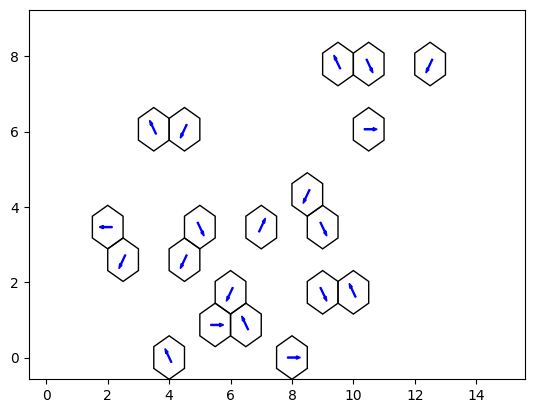

In [56]:
import matplotlib.pyplot as plt
import plotting.plot_tri as pt

pr = pt.ParticleRepresentation()
pr.plot_results_arrows()